# Defining Problem Statement and Analyzing basic metrics 

## 1.) Problem Statement definition and basic metrics analysis

The dataset is of a fitness based company "Aerofit". The data given indicates the details about different threadmils offered by the company.
* Problem Statement definition: Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States

 Let's now move forward to have a look at the data, and analyse the basic metrics. 
 Later we want to 
 1. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male.
 2. Find purchasing trends and comparisions between different categorical vatiables in the data


* User_ID:	User ID
* Product_ID:	Product ID
*  Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount

In [610]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [611]:
walmart_data = pd.read_csv('walmart_data.csv')

# Shape -> Rows,columns
print('Shape of the data set is as follows: ')
print('No. of Rows: '+ str(walmart_data.shape[0]))
print('No. of Columns: '+ str(walmart_data.shape[1]))
print('-------------------------------------------')


Shape of the data set is as follows: 
No. of Rows: 550068
No. of Columns: 10
-------------------------------------------


In [612]:
walmart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


## 2.1 Non-Graphical Analysis: Value counts and unique attributes ​

In [613]:
# Unique attributes 
print("User_ID:  "+ str(walmart_data['User_ID'].value_counts().nunique()) )
print("Product_ID: "+str(walmart_data['Product_ID'].value_counts().nunique()))
print("Gender: "+str(walmart_data['Gender'].value_counts().nunique()))
print("Age: "+str(walmart_data['Age'].value_counts().nunique()))
print("Occupation: "+str(walmart_data['Occupation'].value_counts().nunique()))
print("City_Category: "+str(walmart_data['City_Category'].value_counts().nunique()))
print("Stay_In_Current_City_Years: "+str(walmart_data['Stay_In_Current_City_Years'].value_counts().nunique()))
print("Marital_Status: "+str(walmart_data['Marital_Status'].value_counts().nunique()))
print("Product_Category: "+str(walmart_data['Product_Category'].value_counts().nunique()))
print("Purchase: "+str(walmart_data['Purchase'].value_counts().nunique()))


print("-------------------------")


User_ID:  482
Product_ID: 651
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category: 20
Purchase: 186
-------------------------


In [614]:
#Values of attributes having 5 or less categories based on the above unique value counts

print("City_Category unique values : ")
print(walmart_data['City_Category'].value_counts().index.to_list())
print("-------------------------")

print("Gender uniquwe values ")
print(walmart_data['Gender'].value_counts().index.to_list())
print("-------------------------")


print("Marital_Status unique values ")
print(walmart_data['Marital_Status'].value_counts().index.to_list())
print("-------------------------")

print("Stay_In_Current_City_Years unique values ")
print(walmart_data['Stay_In_Current_City_Years'].value_counts().index.to_list())
print("-------------------------")



City_Category unique values : 
['B', 'C', 'A']
-------------------------
Gender uniquwe values 
['M', 'F']
-------------------------
Marital_Status unique values 
[0, 1]
-------------------------
Stay_In_Current_City_Years unique values 
['1', '2', '3', '4+', '0']
-------------------------


In [615]:
#Values of attributes having more categories based on the above unique value counts

print("Product_Category unique values : ")
print(walmart_data['Product_Category'].value_counts().index.to_list())
print("-------------------------")

print("Occupation unique values : ")
print(walmart_data['Occupation'].value_counts().index.to_list())
print("-------------------------")

print("Age grouped unique values : ")
print(walmart_data['Age'].value_counts().index.to_list())
print("-------------------------")



Product_Category unique values : 
[5, 1, 8, 11, 2, 6, 3, 4, 16, 15, 13, 10, 12, 7, 18, 20, 19, 14, 17, 9]
-------------------------
Occupation unique values : 
[4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, 3, 10, 5, 15, 11, 19, 13, 18, 9, 8]
-------------------------
Age grouped unique values : 
['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
-------------------------


## 3. Visual Analysis - Univariate & Bivariate


### 3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis


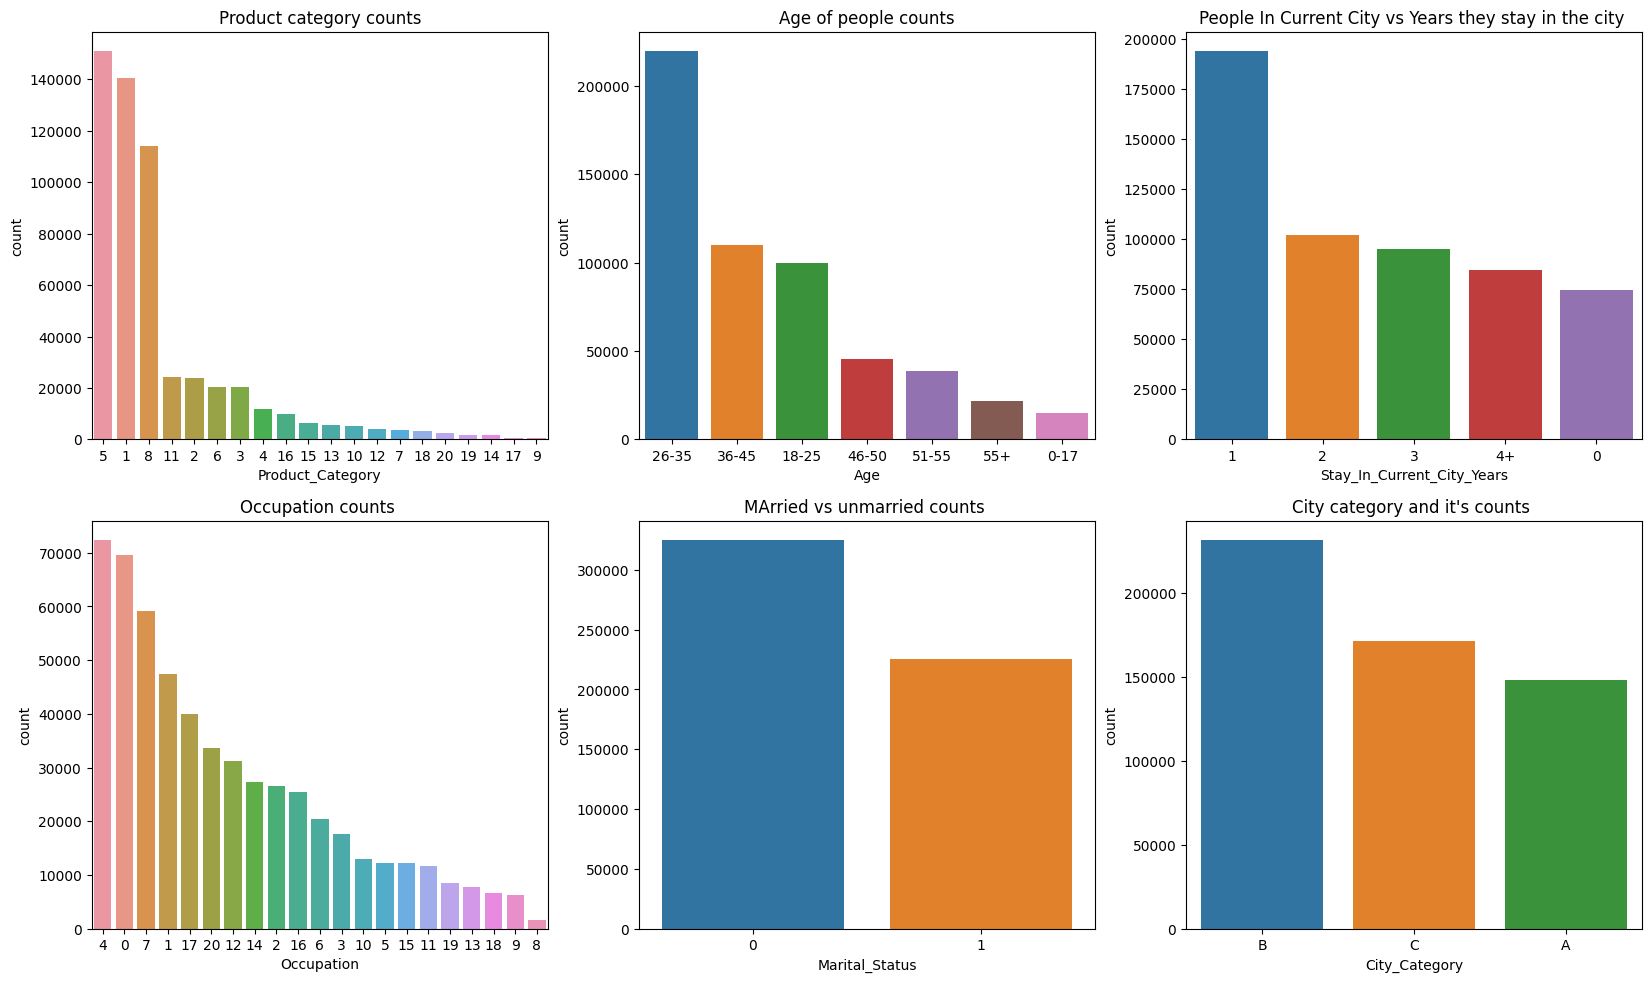

In [616]:
# Distplot

fig = plt.figure(figsize=[20,18])

plt.subplot(3,3,1)
sns.countplot(data=walmart_data,x='Product_Category',order=walmart_data['Product_Category'].value_counts().sort_values(ascending=False).index)
plt.title("Product category counts")

plt.subplot(3,3,2)
sns.countplot(data=walmart_data,x='Age',order=walmart_data['Age'].value_counts().sort_values(ascending=False).index)
plt.title("Age of people counts")

plt.subplot(3,3,3)
sns.countplot(data=walmart_data,x='Stay_In_Current_City_Years',order=walmart_data['Stay_In_Current_City_Years'].value_counts().sort_values(ascending=False).index)
plt.title("People In Current City vs Years they stay in the city ")

plt.subplot(3,3,4)
sns.countplot(data=walmart_data,x='Occupation',order=walmart_data['Occupation'].value_counts().sort_values(ascending=False).index)
plt.title("Occupation counts ")



plt.subplot(3,3,5)
sns.countplot(data=walmart_data,x='Marital_Status',order=walmart_data['Marital_Status'].value_counts().sort_values(ascending=False).index)
plt.title("MArried vs unmarried counts ")

plt.subplot(3,3,6)
sns.countplot(data=walmart_data,x='City_Category',order=walmart_data['City_Category'].value_counts().sort_values(ascending=False).index)
plt.title("City category and it's counts ")

plt.show()




#### Observations
* Cateogry 5 , 1 , 8 are purchaced the most across the given sample people
* Age 25-35 tend to purchase the most at walmart (according to the sample data)
* Most people tend to stay in the city for 1 year only
* Occupation 4,0,7 tend to be the most popular occupations of the people who made purchases
* City B has the most walmart purchases
* The data set has more set of married people than unmarried

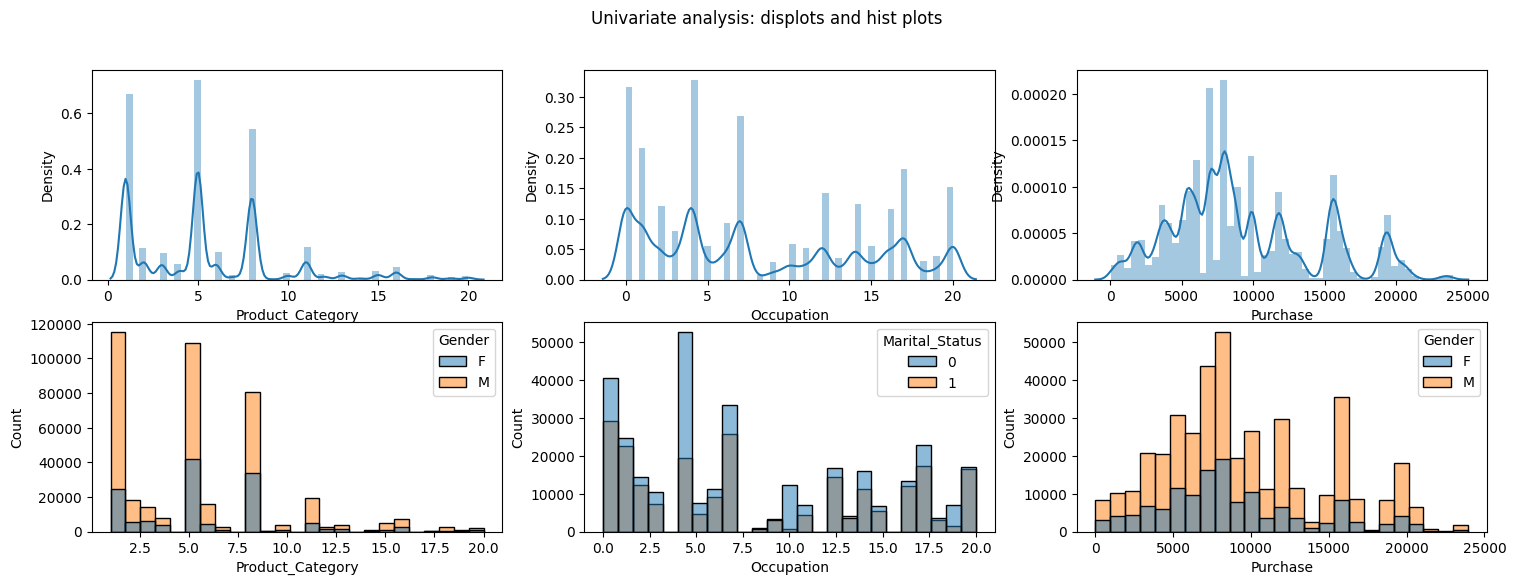

In [617]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Univariate analysis: displots and hist plots")
plt.subplot(2,3,1)
sns.distplot(walmart_data["Product_Category"])
plt.subplot(2,3,4)
sns.histplot(x='Product_Category',data = walmart_data,hue='Gender',bins=25)

plt.subplot(2,3,2)
sns.distplot(walmart_data["Occupation"])
plt.subplot(2,3,5)
sns.histplot(x='Occupation',data = walmart_data,hue='Marital_Status',bins=25)

plt.subplot(2,3,3)
sns.distplot(walmart_data["Purchase"])
plt.subplot(2,3,6)
sns.histplot(x='Purchase',data = walmart_data,hue='Gender',bins=25)

plt.show()


### Observations
* Men usually are purchasing more than women from walmart (may vary is sample is differed)
* Single people tend to have 4 as occupation 

#### Bivariate analysis

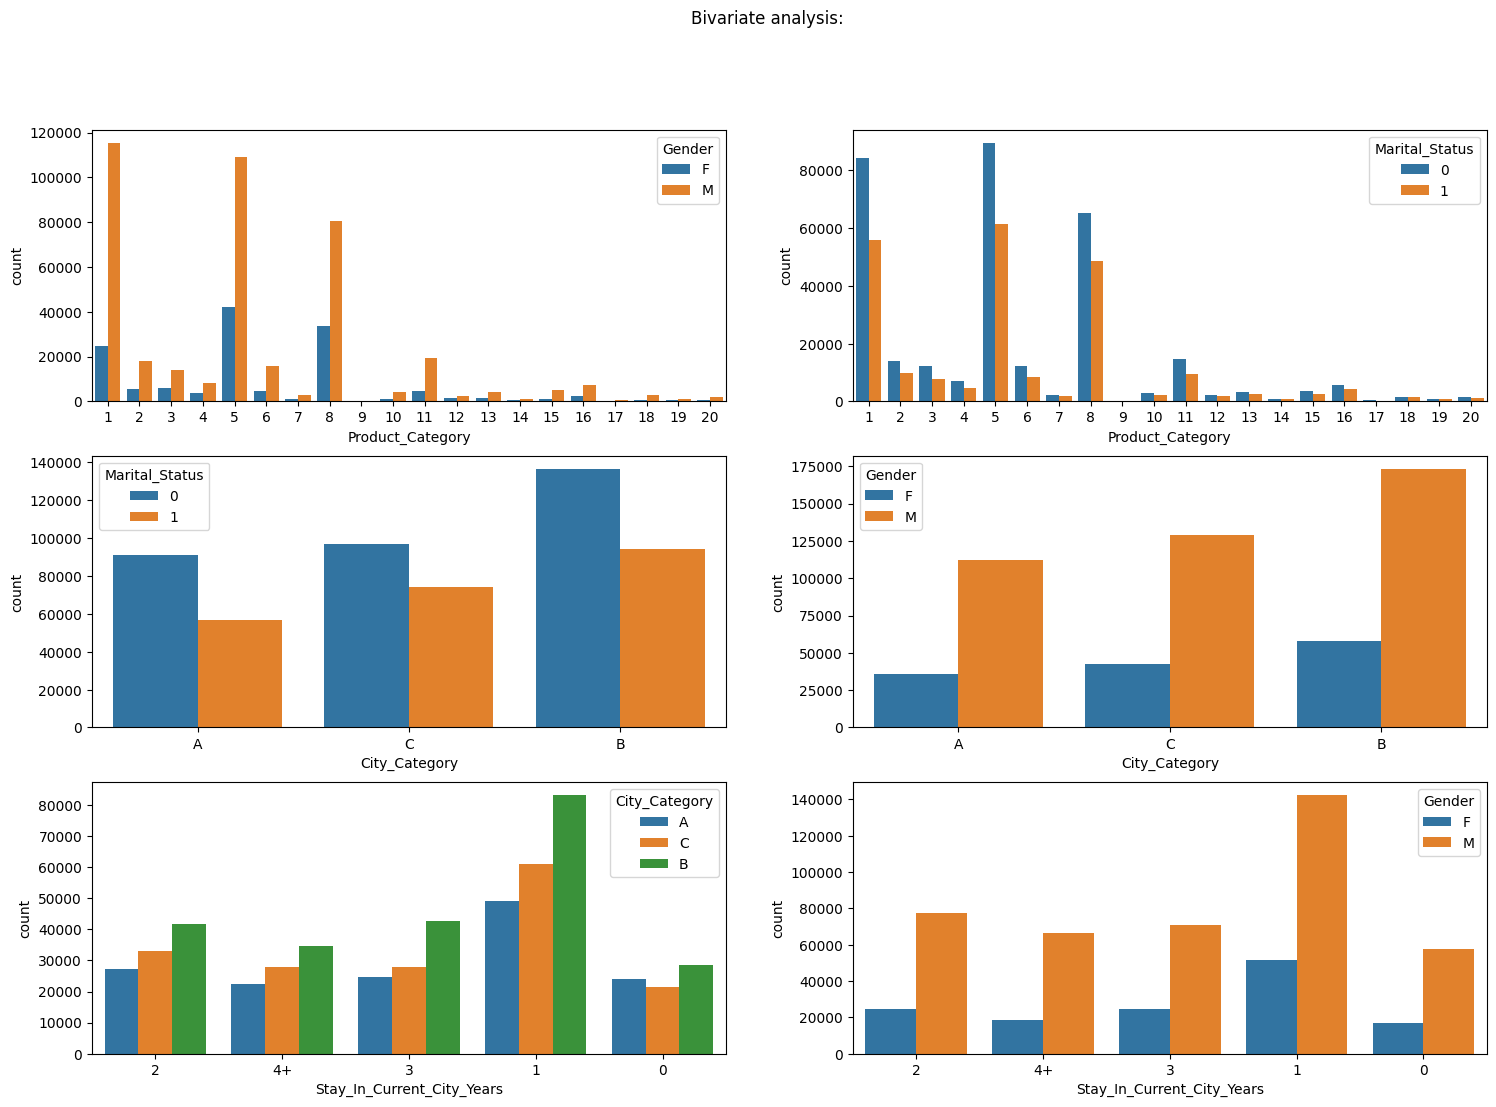

In [618]:
### Bivariate analysis
fig= plt.figure(figsize=(18,12))
fig.suptitle("Bivariate analysis:")
plt.subplot(3,2,1)

sns.countplot(x = 'Product_Category', data = walmart_data, hue = 'Gender')

plt.subplot(3,2,2)
sns.countplot(x = 'Product_Category', data = walmart_data, hue = 'Marital_Status')


plt.subplot(3,2,3)
sns.countplot(x = 'City_Category', data = walmart_data, hue = 'Marital_Status')

plt.subplot(3,2,4)
sns.countplot(x = 'City_Category', data = walmart_data, hue = 'Gender')

plt.subplot(3,2,5)
sns.countplot(x = 'Stay_In_Current_City_Years', data = walmart_data, hue = 'City_Category')

plt.subplot(3,2,6)
sns.countplot(x = 'Stay_In_Current_City_Years', data = walmart_data, hue = 'Gender')



plt.show()

#### Observations
* It is observed that most people purchasing in walmart (from the sample), stay in any current city for mostly one year. Especially city B
* Males in city B are compared to be higher than the other two.
* Top product catogory among Females:  ->   5  follwed by 8 and 1 in descending order
* Top product catogory among Males:  ->   1 followed by 5 and 8 in descending order
* Single people are largely in city B and C, coincidentally having more male numbers :P


<Axes: xlabel='Age', ylabel='count'>

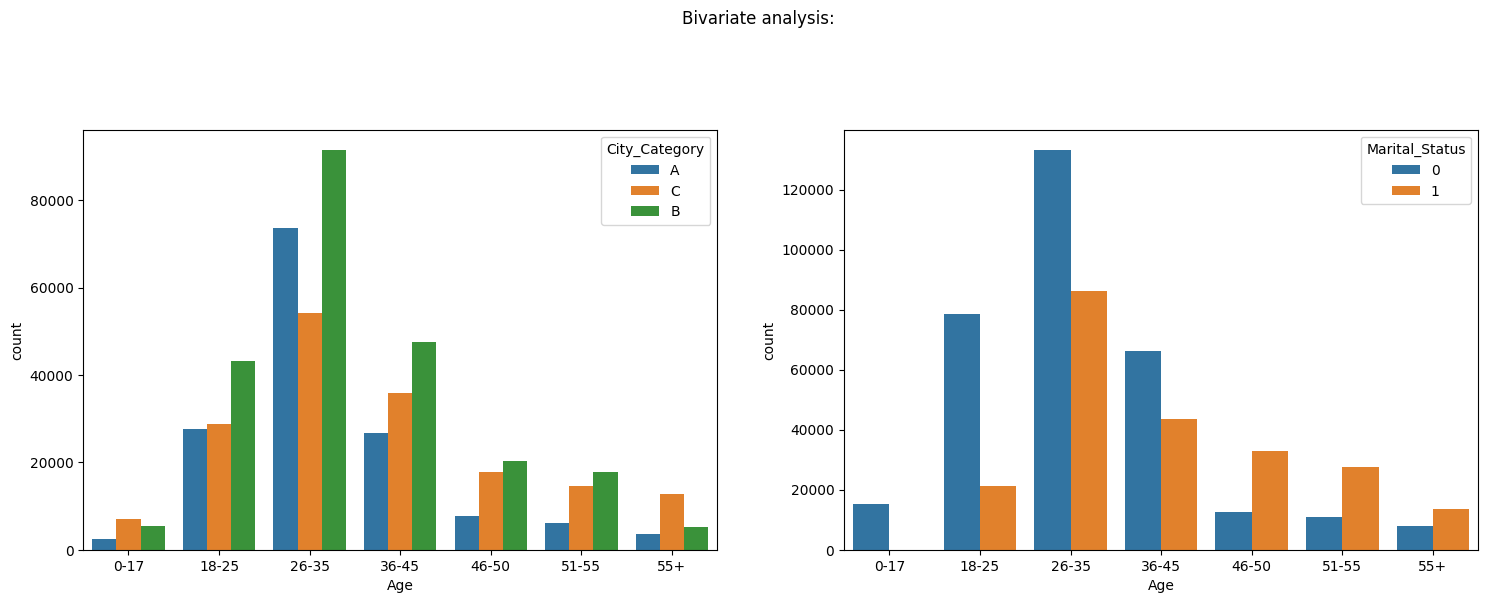

In [619]:
fig= plt.figure(figsize=(18,12))
fig.suptitle("Bivariate analysis:")
plt.subplot(2,2,1)

sns.countplot(x = 'Age', data = walmart_data, hue = 'City_Category',order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.subplot(2,2,2)
sns.countplot(x = 'Age', data = walmart_data, hue = 'Marital_Status',order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])


#### Observations
* As seen it is observed that age 26-25 make the most purchases in walmart
* City C seems to have less of 55+ year olds and 0-17 year olds as compared to all othe age goups
* People have a spike in marital status at 26-35 

### 3.2 For categorical variable(s): Boxplot, Lineplot


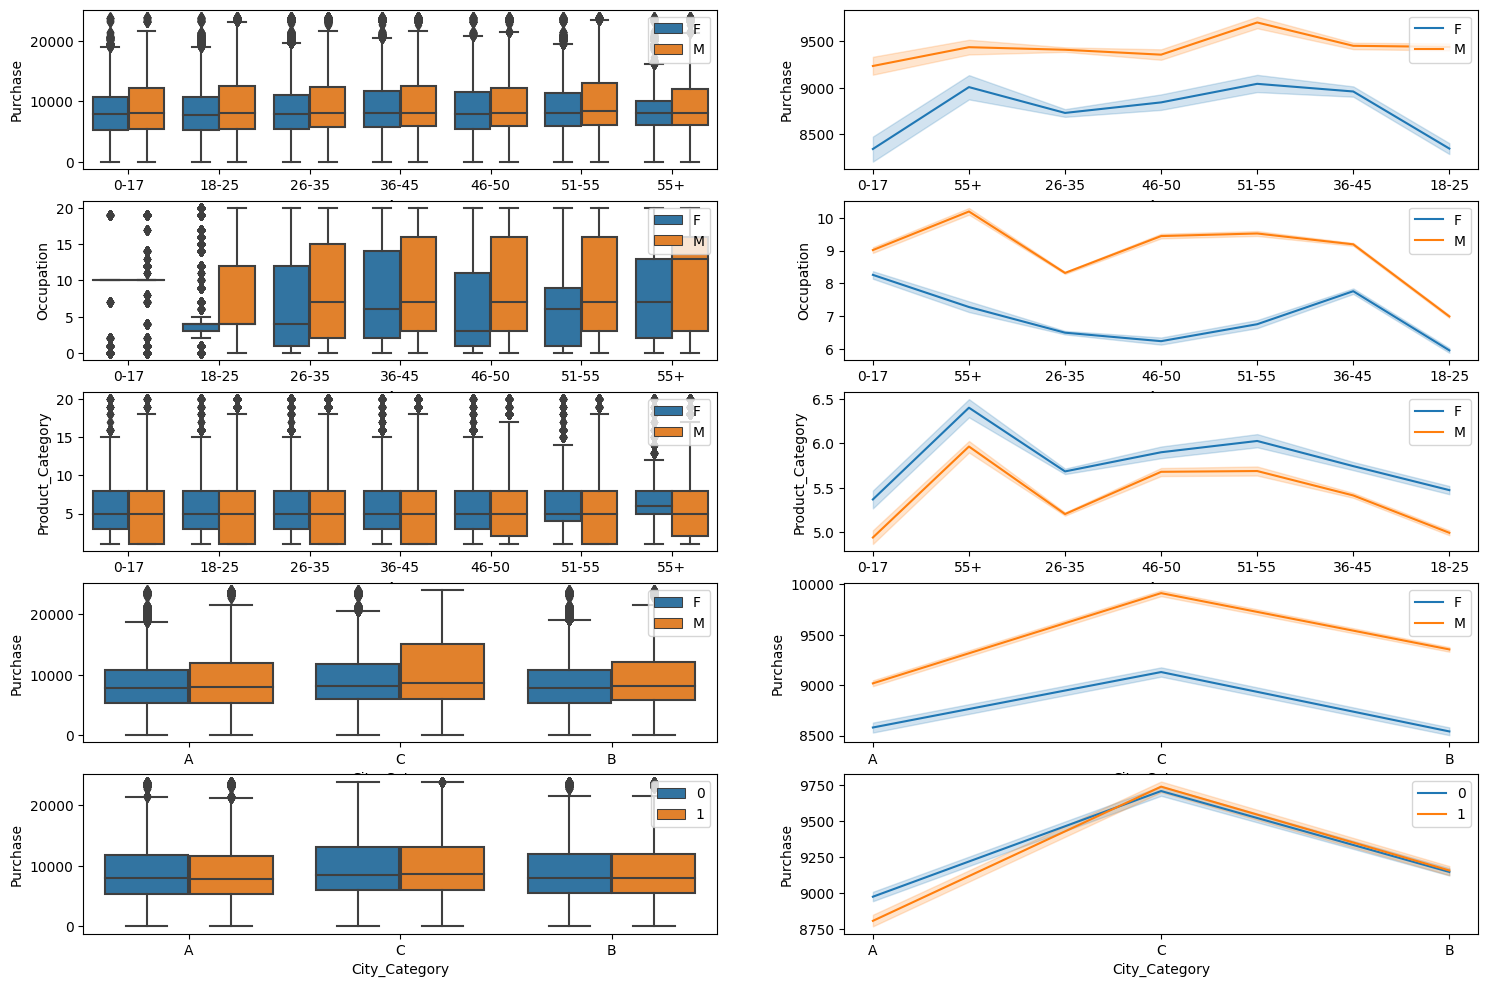

In [620]:
fig= plt.figure(figsize=(18,12))

plt.subplot(5,2,1)
sns.boxplot(x='Age',y='Purchase',hue='Gender',data=walmart_data,order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.legend(loc='upper right')
plt.subplot(5,2,2)
sns.lineplot(data=walmart_data, x='Age',y='Purchase',hue = 'Gender')
plt.legend(loc='upper right')

plt.subplot(5,2,3)
sns.boxplot(x='Age',y='Occupation',hue='Gender',data=walmart_data,order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.legend(loc='upper right')

plt.subplot(5,2,4)
sns.lineplot(data=walmart_data, x='Age',y='Occupation',hue = 'Gender')
plt.legend(loc='upper right')

plt.subplot(5,2,5)
sns.boxplot(x='Age',y='Product_Category',hue='Gender',data=walmart_data,order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.legend(loc='upper right')

plt.subplot(5,2,6)
sns.lineplot(data=walmart_data, x='Age',y='Product_Category',hue = 'Gender')
plt.legend(loc='upper right')

plt.subplot(5,2,7)
sns.boxplot(x='City_Category',y='Purchase',hue='Gender',data=walmart_data)
plt.legend(loc='upper right')

plt.subplot(5,2,8)
sns.lineplot(data=walmart_data, x='City_Category',y='Purchase',hue = 'Gender')
plt.legend(loc='upper right')

plt.subplot(5,2,9)
sns.boxplot(x='City_Category',y='Purchase',hue='Marital_Status',data=walmart_data)
plt.legend(loc='upper right')

plt.subplot(5,2,10)
sns.lineplot(data=walmart_data, x='City_Category',y='Purchase',hue = 'Marital_Status')
plt.legend(loc='upper right')


plt.show()
#sns.boxplot(x='City_Category',y='Purchase',hue='Gender',data=walmart_data)



#### Observation
* City C people tend to make expensive purchases
* The options of occupations females of 18-25 have is around occupation 5 and 6 unlike makes who have varied options between occupation numer 4 - 11
* 55+ age group explore Product_Category above 6 

### 3.3 For correlation: Heatmaps, Pairplots

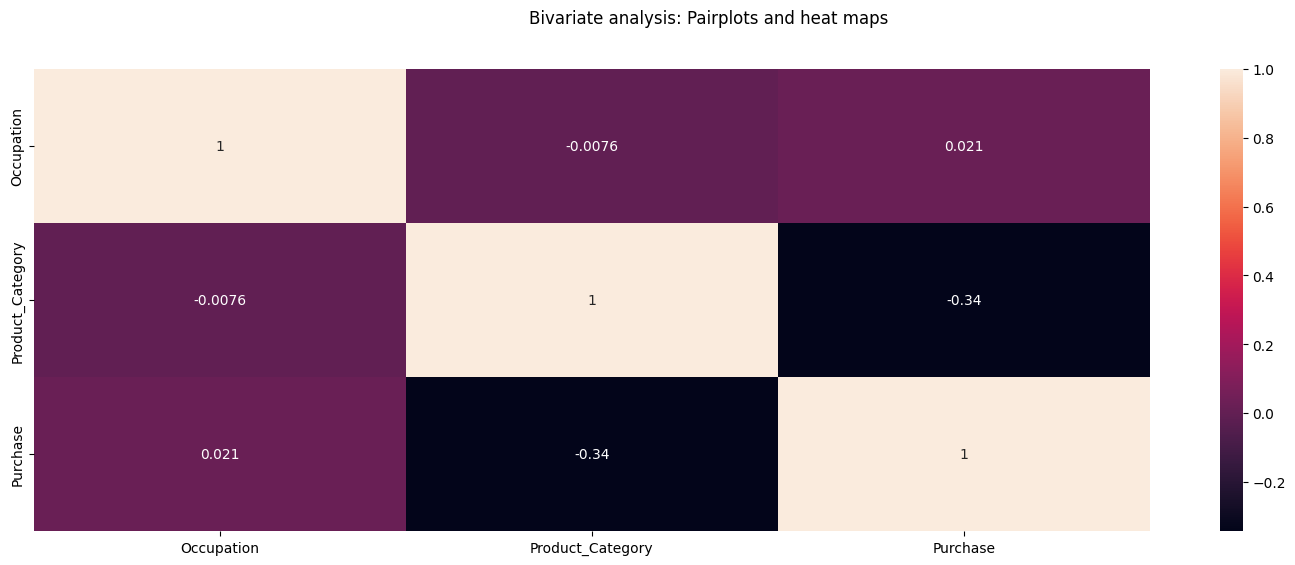

In [621]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Bivariate analysis: Pairplots and heat maps")
# Customer Profiling - Categorization of users.

sns.heatmap(walmart_data[['Occupation','Product_Category','Purchase']].corr(), annot=True)

plt.show()

<Figure size 1800x1000 with 0 Axes>

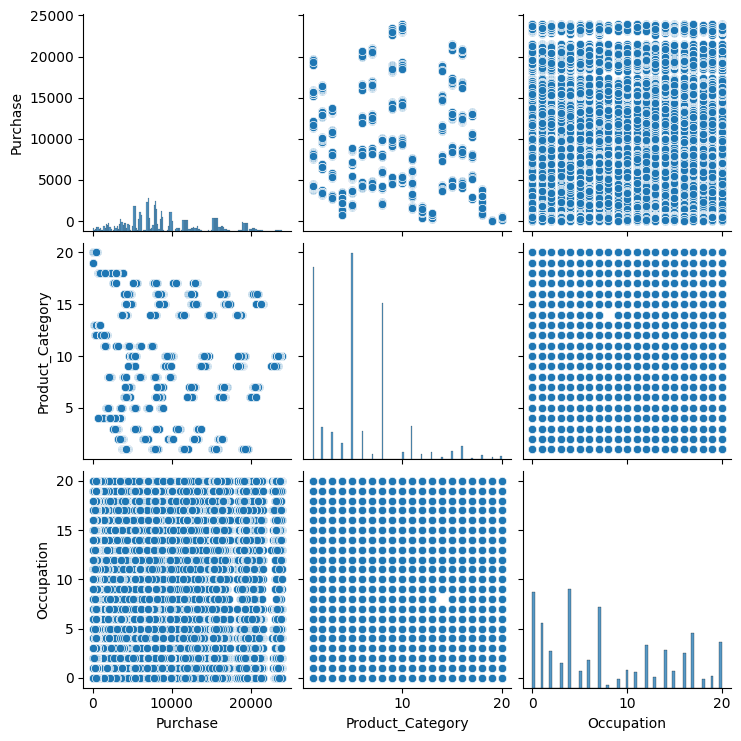

In [622]:
fig= plt.figure(figsize=(18,10))
sns.pairplot( data = walmart_data[['Purchase','Product_Category','Occupation']])

## 4. Missing Value & Outlier Detection


In [623]:
# Missging values

for column in walmart_data.columns:
    print("Number of missing values in "+column+" : "+str(walmart_data[walmart_data["Product_Category"].isnull()].count()[0]))


Number of missing values in User_ID : 0
Number of missing values in Product_ID : 0
Number of missing values in Gender : 0
Number of missing values in Age : 0
Number of missing values in Occupation : 0
Number of missing values in City_Category : 0
Number of missing values in Stay_In_Current_City_Years : 0
Number of missing values in Marital_Status : 0
Number of missing values in Product_Category : 0
Number of missing values in Purchase : 0


5823.0 12054.0
Total count before removing outliers: 550068
Total count after removing outliers: 547391


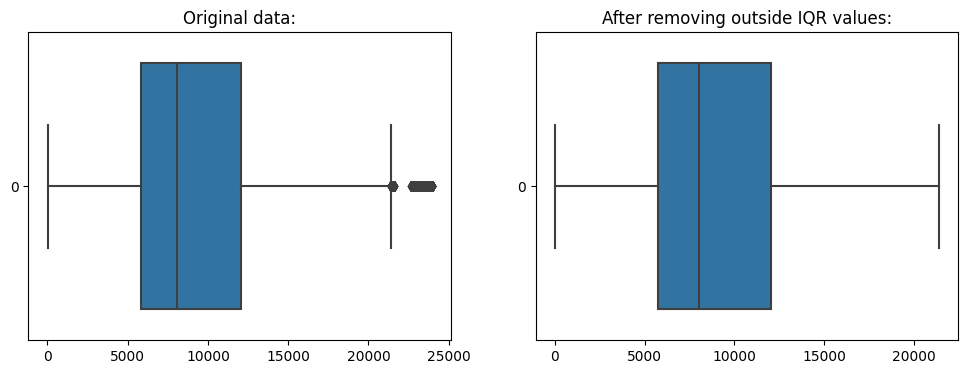

In [624]:
# Outliers are the ones that have 
Q3 = walmart_data['Purchase'].quantile(0.75)
Q1 = walmart_data['Purchase'].quantile(0.25)
print(Q1,Q3)
IQR = Q3 - Q1
plt.figure(figsize=[12,4])
print("Total count before removing outliers: " + str(walmart_data['Purchase'].count()))
print("Total count after removing outliers: " + str(walmart_data[(walmart_data['Purchase']> (Q1 - 1.5 *(IQR))) & (walmart_data['Purchase']<(Q3 + 1.5 *(IQR)))].count()[0]))

plt.subplot(1,2,1)
plt.title("Original data:")
sns.boxplot(data=walmart_data['Purchase'], orient='h')

# We only include those which are ion the range 
# [ Q1 - (1.5 * IQR) , Q3 + 1.5 *(IQR)]
plt.subplot(1,2,2)
plt.title("After removing outside IQR values:")
walmart_data_no_outliers = walmart_data[(walmart_data['Purchase']> (Q1 - 1.5 *(IQR))) & (walmart_data['Purchase']<(Q3 + 1.5 *(IQR)))]
sns.boxplot(data=walmart_data_no_outliers['Purchase'], orient='h')
plt.show()


# Let's remove top 5% values after IQR range
walmart_data[walmart_data['Purchase']> (Q3 + 1.5 *(IQR))]['Purchase'].sort_values(ascending=False).count() / walmart_data['Purchase'].count() 
# Let's remove top 1% values before IQR range
walmart_data['Purchase'].count() 
walmart_data = walmart_data_no_outliers

## CENTRAL LIMIT THEORM AND CONFIDENCE INTERVAL
The central limit theorm as we know it states that, if multiple samples are taken from the original dataset and mean is computed for each randomly picked sample. The means of such samples would follow a normal distribution 

### Assumptions
* Data samples must be randomly picked
* Sample size must be large enough for the sampling distribution to form any distribution
* We sample with repetiton

## Bootstraping and KDE plot with a Confidence
 Let's say we we want to compare two different samples and state the range of values we can say with a particualr confidence level
 * Step - 1 : Compute means of a fixed number of iterations, let's say 5000 and randomly sample some values with replacement.
 * Step - 2 : Find the means of all such sample, both for the two gender's sample
 * Step - 3 : The means list obtained by randomly sampling 5000 samples  and calcualting each of it's mean, will give us a list of values whose distribution is approximately normal 
 * Step - 4 : Find the z-critical value
 * Step - 5 : Find lower limit and upper limit based on the critical value, mean and std-dev for each sample
 

In [625]:
# # Let's say we we want to compare the sampee sizr interval of 95%
import statistics
import math
from scipy import stats

def bootstrap(walmart_data_sample_1 ,walmart_data_sample_2,two_tailed_test, sample_size,confidence, itreations):

    #Inititalizing means as nulls 
    walmart_data_sample_1_means = np.empty(itreations)
    walmart_data_sample_2_means = np.empty(itreations)

    # Creating 5000 samples by random pick from data with repetetion
    for i in range(itreations):
        sample_1 = np.empty(itreations)
        sample_2 = np.empty(itreations)
        #Picking sample values of size sample_Size for both our original samples
        sample_1 = np.random.choice(walmart_data_sample_1,size= sample_size, replace=True)
        sample_2 = np.random.choice(walmart_data_sample_2,size=sample_size,replace=True)
        #print(sample_1)
        #Storing the means in an array which has the sample size of the number of iterations mentioned
        walmart_data_sample_1_means[i] =  np.mean(sample_1)
        walmart_data_sample_2_means[i] =  np.mean(sample_2)

    # Desired C.I = Alpha
    # Alpha = (1 - C.I)/2 -> if CI = 0.90 -> Aplha = (1-0.90)/2 = (0.10)/2 = 0.5
    if two_tailed_test == True:
        Aplha = (1 - confidence)/2
        z_critical = stats.norm.ppf(1-Aplha)
    #print(z_critical)
    # Find sample mean, sample std deviation and standard error for sample 1
    
    # MEAN of sample means
    mean_of_walmart_data_sample_1_means = np.mean(walmart_data_sample_1_means)
    #print(mean_of_walmart_data_sample_1_means)
    # Std_dev of sample means
    mean_of_walmart_data_sample_1_std_dev = statistics.stdev(walmart_data_sample_1_means)
  
    # Find sample mean, sample std deviation and standard error for sample 2
    
    # MEAN of sample means
    mean_of_walmart_data_sample_2_means = np.mean(walmart_data_sample_2_means)
    # Std_dev of sample means
    mean_of_walmart_data_sample_2_std_dev = statistics.stdev(walmart_data_sample_2_means)
 
    # Since we see two_tailed  = True, we need to compute CI in such a way we eliminate the left and right side values and only focus on the interval
    # Z_critical = X - mean/ std_dev  -> 
    # X = Z_critical * std_dev + mean  

    lower_limit_sample1 =  mean_of_walmart_data_sample_1_means - (z_critical * mean_of_walmart_data_sample_1_std_dev)
    upper_limit_sample1 =  mean_of_walmart_data_sample_1_means + (z_critical * mean_of_walmart_data_sample_1_std_dev)

    
    lower_limit_sample2 =  mean_of_walmart_data_sample_2_means - (z_critical * mean_of_walmart_data_sample_2_std_dev)
    upper_limit_sample2 =  mean_of_walmart_data_sample_2_means + (z_critical * mean_of_walmart_data_sample_2_std_dev)

    return mean_of_walmart_data_sample_1_means,lower_limit_sample1, upper_limit_sample1 ,mean_of_walmart_data_sample_2_means,lower_limit_sample2, upper_limit_sample2 , walmart_data_sample_1_means, walmart_data_sample_2_means






#### Bootstrap age to loop around all the age groups present (instead of just two samples comparision)

In [626]:
# # Let's say we we want to compare the sampee sizr interval of 95%
import statistics
import math
from scipy import stats


def bootstrap_age(walmart_data_sample_1 ,two_tailed_test, sample_size,confidence, itreations):

    #Inititalizing means as nulls 
    walmart_data_sample_1_means = np.empty(itreations)
    walmart_data_sample_2_means = np.empty(itreations)

    # Creating 500 samples by random pick from data with repetetion
    for i in range(itreations):
        sample_1 = np.empty(itreations)
        #Picking sample values of size sample_Size for both our original samples
        sample_1 = np.random.choice(walmart_data_sample_1,size= sample_size, replace=True)
        #print(sample_1)
        #Storing the means in an array which has the sample size of the number of iterations mentioned
        walmart_data_sample_1_means[i] =  np.mean(sample_1)

    # Desired C.I = Alpha
    # Alpha = (1 - C.I)/2 -> if CI = 0.90 -> Aplha = (1-0.90)/2 = (0.10)/2 = 0.5
    if two_tailed_test == True:
        Aplha = (1 - confidence)/2
        z_critical = stats.norm.ppf(1-Aplha)
    #print(z_critical)
    # Find sample mean, sample std deviation and standard error for sample 1
    
    # MEAN of sample means
    mean_of_walmart_data_sample_1_means = np.mean(walmart_data_sample_1_means)
    #print(mean_of_walmart_data_sample_1_means)
    # Std_dev of sample means
    mean_of_walmart_data_sample_1_std_dev = statistics.stdev(walmart_data_sample_1_means)
    # Standard error 
    mean_of_walmart_data_sample_1_error = stats.sem(walmart_data_sample_1_means)

    # Find sample mean, sample std deviation and standard error for sample 2
    

    # Since we see two_tailed  = True, we need to compute CI in such a way we eliminate the left and right side values and only focus on the interval
    # Z_critical = X - mean/ std_dev  -> 
    # X = Z_critical * std_dev + mean  

    lower_limit_sample1 =  mean_of_walmart_data_sample_1_means - (z_critical * mean_of_walmart_data_sample_1_std_dev)
    upper_limit_sample1 =  mean_of_walmart_data_sample_1_means + (z_critical * mean_of_walmart_data_sample_1_std_dev)



    return mean_of_walmart_data_sample_1_means,lower_limit_sample1, upper_limit_sample1 , walmart_data_sample_1_means



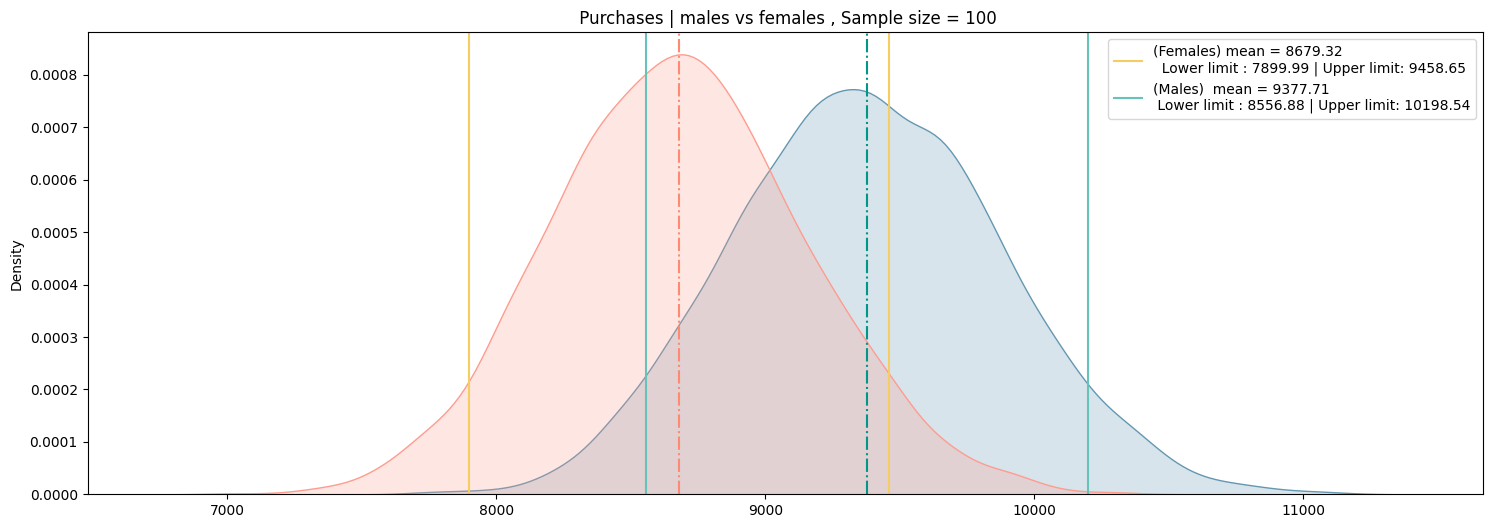

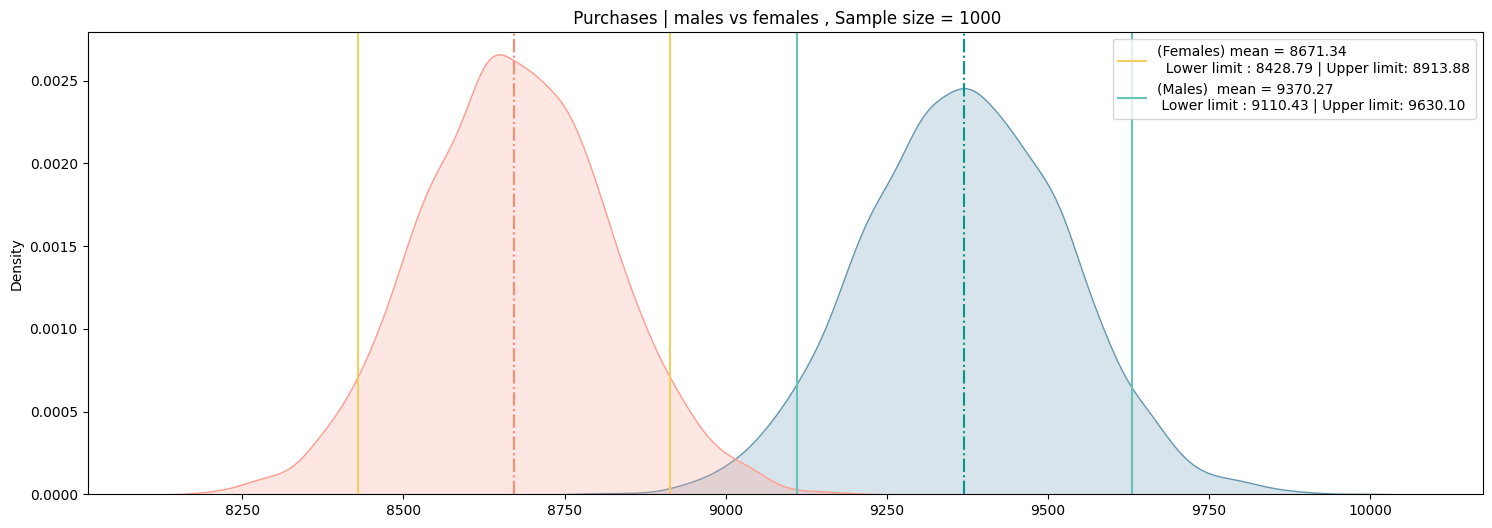

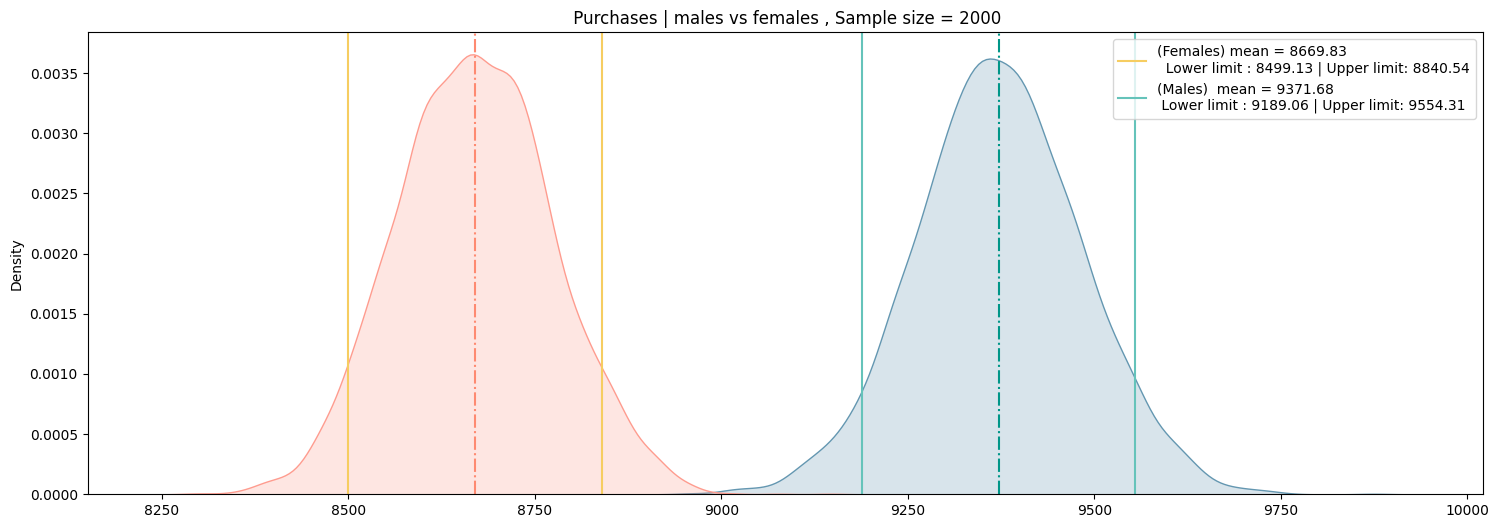

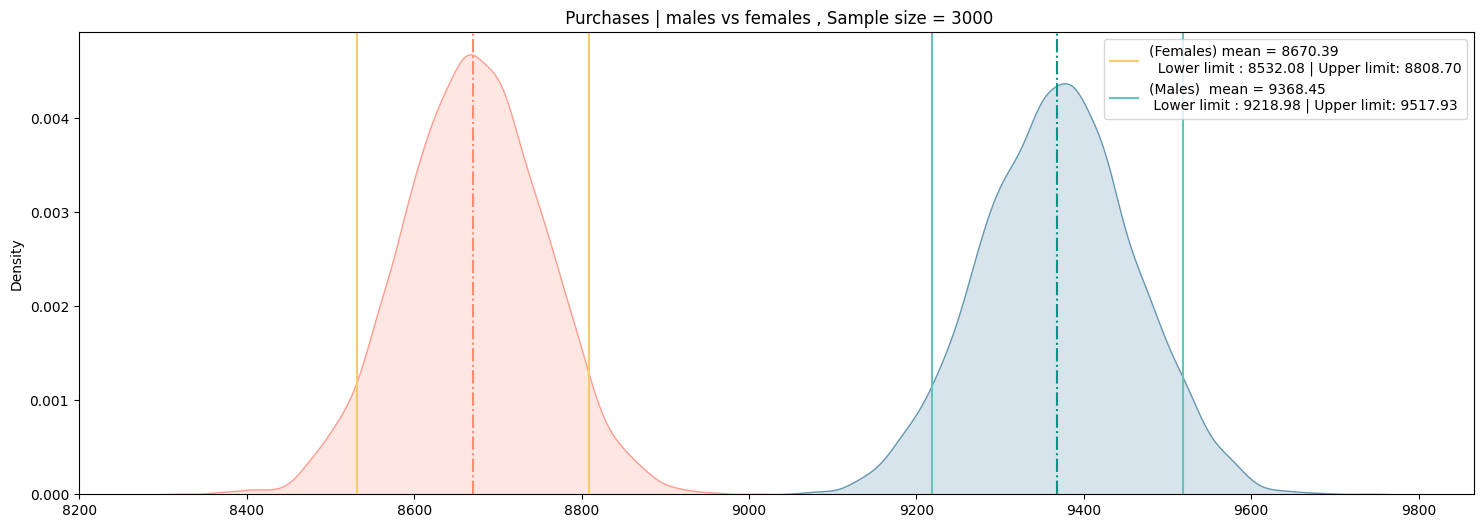

In [627]:
# Males vs Females purchase with a CI = 90%
walmart_data_male_sample = walmart_data.loc[walmart_data["Gender"]=='M']['Purchase']
walmart_data_female_sample= walmart_data.loc[walmart_data["Gender"]=='F']['Purchase']

sample_size_options = [100,1000,2000,3000]

for i in sample_size_options:
        plt.figure(figsize=(18,6))
        plt.title(" Purchases | males vs females , Sample size = "+ str(i))
        mean_of_walmart_data_sample_1_means, lower_limit_sample1,upper_limit_sample1, mean_of_walmart_data_sample_2_means,lower_limit_sample2,\
        upper_limit_sample2 , walmart_data_sample_1_means, walmart_data_sample_2_means  = \
                bootstrap(walmart_data_male_sample , walmart_data_female_sample, True, i,0.90,5000)

        sns.kdeplot(data= walmart_data_sample_1_means,fill= True,color='#6497b1')
        sns.kdeplot(data= walmart_data_sample_2_means,fill= True,color='#fe9c8f')

        label_1 = "(Males)  mean = {:.2f}\n Lower limit : {:.2f} | Upper limit: {:.2f}".format(mean_of_walmart_data_sample_1_means,lower_limit_sample1,upper_limit_sample1)
        label_2 = "(Females) mean = {:.2f}\n  Lower limit : {:.2f} | Upper limit: {:.2f}".format(mean_of_walmart_data_sample_2_means,lower_limit_sample2,upper_limit_sample2)

        plt.axvline(mean_of_walmart_data_sample_2_means,linestyle= 'dashdot',color = '#fe8a71')
        plt.axvline(lower_limit_sample2,color = '#f6cd61',label=label_2)
        plt.axvline(upper_limit_sample2,color = '#f6cd61')


        plt.axvline(mean_of_walmart_data_sample_1_means,linestyle= 'dashdot',color = '#009688')
        plt.axvline(lower_limit_sample1,color = '#65c3ba',label=label_1)
        plt.axvline(upper_limit_sample1,color = '#65c3ba')
        plt.legend(loc='upper right')
        plt.show()

### Observations (Confidence 90%)
* We can see as we increase the sample size the male's spend and female's spend seperates
* Males tend to spend from 9219 to 9520 
* Females spending lower than male ranging from 8528 and 8811

Are women spending more money per transaction than men? Why or Why not? 
* Women seems to spend less than men from the above KDE plot (Confidence 90%)

Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
* As we see sample sizes 100,100,2000 have overlaps, hence we can't say anything with 90% confidence
* As the sample size increases we observe femalse spend less
* Using this insight walmart should incease female traction, by pushing in ads and campaings targetting female products
* Discounts can be given to femlae products to attract more females

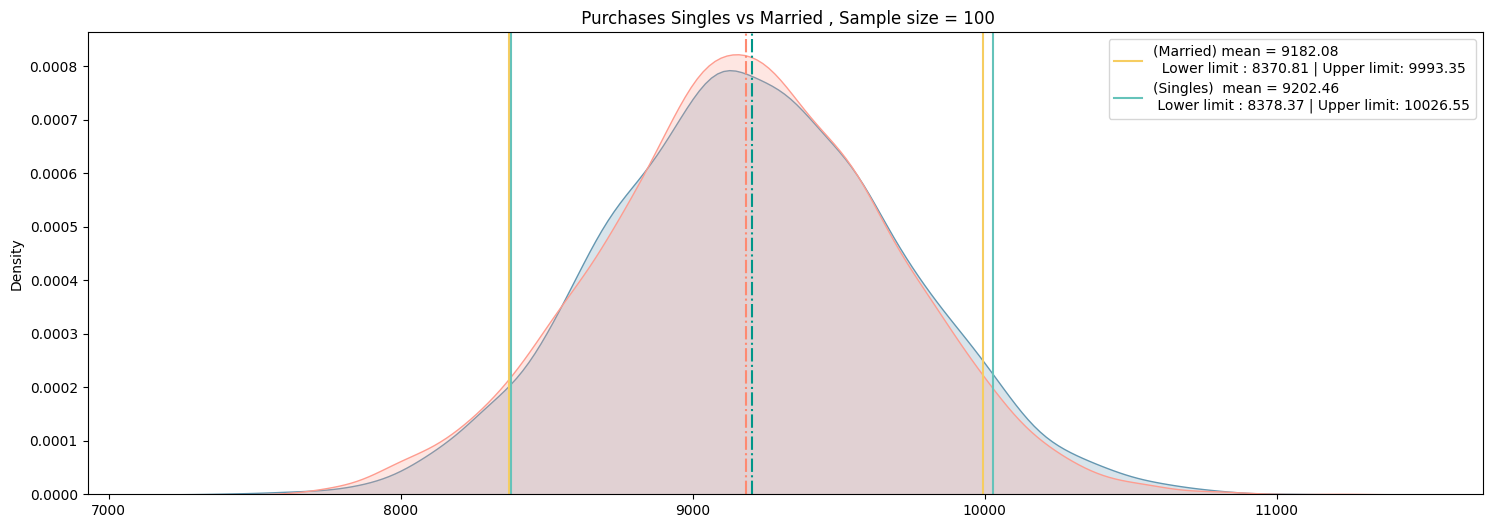

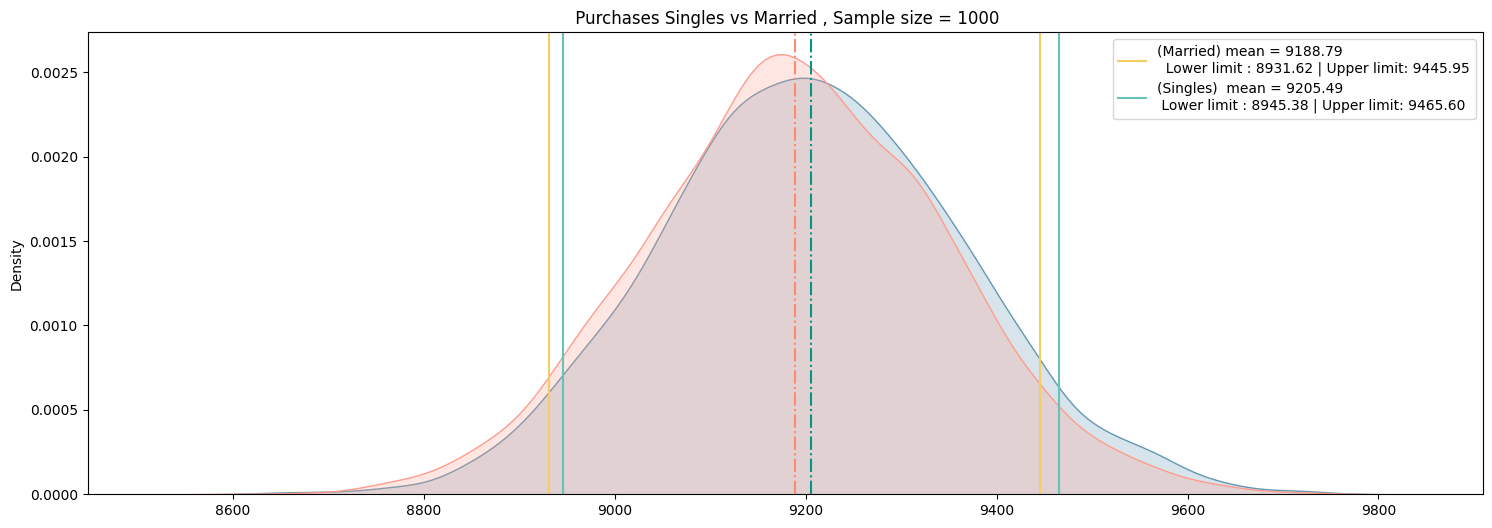

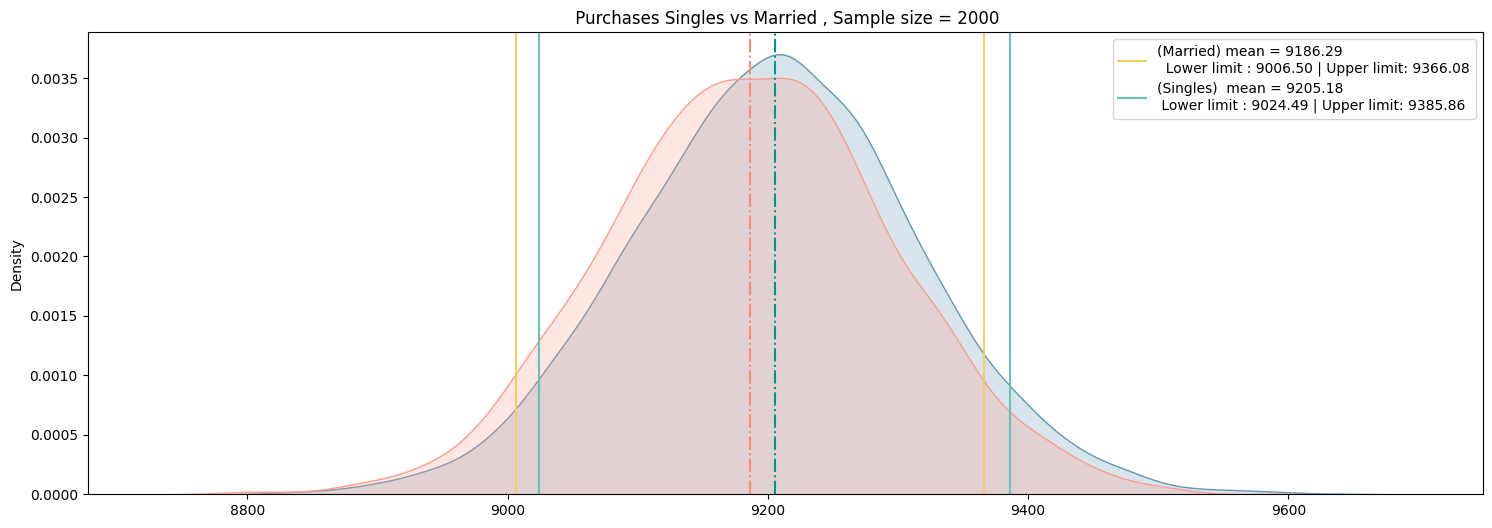

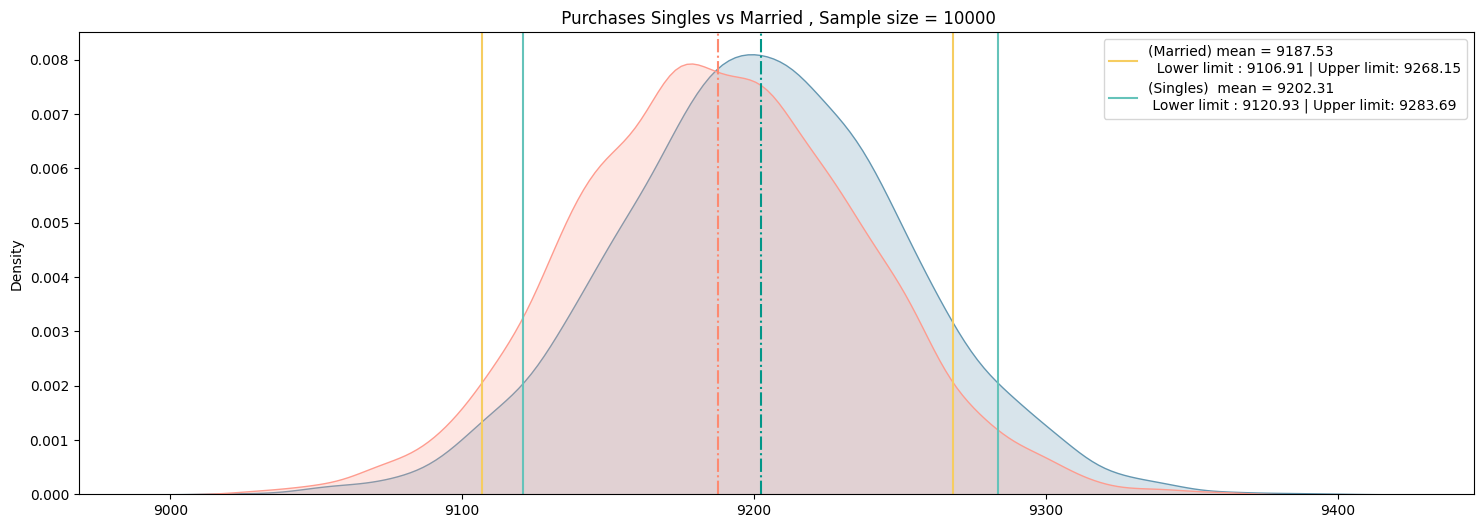

In [628]:

# MArried vs Unmarried
walmart_data_singles_sample = walmart_data.loc[walmart_data["Marital_Status"]==0]['Purchase']
walmart_data_married_sample= walmart_data.loc[walmart_data["Marital_Status"]==1]['Purchase']
sample_size_options = [100,1000,2000,10000]

for i in sample_size_options:
        
        plt.figure(figsize=(18,6))

        plt.title(" Purchases Singles vs Married , Sample size = "+ str(i))
        mean_of_walmart_data_sample_1_means, lower_limit_sample1,upper_limit_sample1, mean_of_walmart_data_sample_2_means,lower_limit_sample2,\
        upper_limit_sample2 , walmart_data_sample_1_means, walmart_data_sample_2_means  = \
                bootstrap(walmart_data_singles_sample , walmart_data_married_sample, True, i,0.90,5000)

        sns.kdeplot(data= walmart_data_sample_1_means,fill= True,color='#6497b1')
        sns.kdeplot(data= walmart_data_sample_2_means,fill= True,color='#fe9c8f')

        label_1 = "(Singles)  mean = {:.2f}\n Lower limit : {:.2f} | Upper limit: {:.2f}".format(mean_of_walmart_data_sample_1_means,lower_limit_sample1,upper_limit_sample1)
        label_2 = "(Married) mean = {:.2f}\n  Lower limit : {:.2f} | Upper limit: {:.2f}".format(mean_of_walmart_data_sample_2_means,lower_limit_sample2,upper_limit_sample2)

        plt.axvline(mean_of_walmart_data_sample_2_means,linestyle= 'dashdot',color = '#fe8a71')
        plt.axvline(lower_limit_sample2,color = '#f6cd61',label=label_2)
        plt.axvline(upper_limit_sample2,color = '#f6cd61')


        plt.axvline(mean_of_walmart_data_sample_1_means,linestyle= 'dashdot',color = '#009688')
        plt.axvline(lower_limit_sample1,color = '#65c3ba',label=label_1)
        plt.axvline(upper_limit_sample1,color = '#65c3ba')
        plt.legend(loc='upper right')
        plt.show()

### Observations with a Confidence of 90%:
Results when the same activity is performed for Married vs Unmarried
* Since there is always an overlap no matter we increase the sample size, we can say being married or unmarried doesn't change the spend

### Results when the same activity is performed for Age

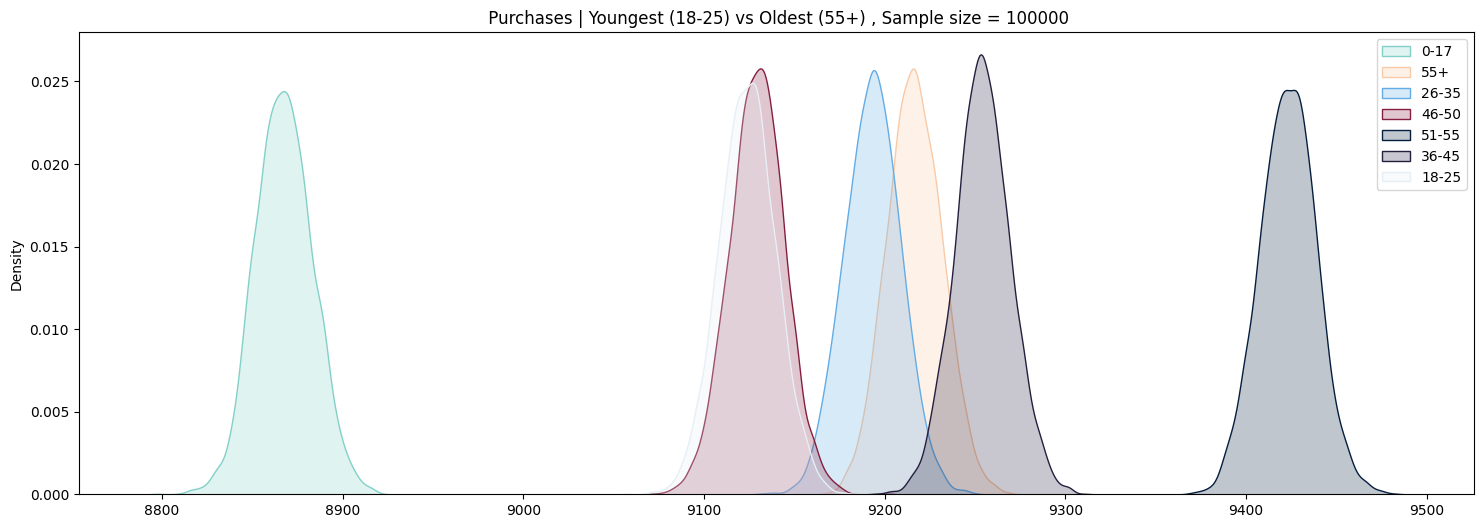

In [629]:

walmart_data_sample_age_1 = walmart_data.loc[walmart_data["Age"] == '55+']['Purchase']


sample_size_options = [100000]
age_groups = list(walmart_data["Age"].unique())
color_list = ['#83d0c9','#f9caa7','#63ace5','#851e3e','#051e3e','#251e3e','#e7eff6']
for i in sample_size_options:

        plt.figure(figsize=(18,6))
        plt.title(" Purchases | Youngest (18-25) vs Oldest (55+) , Sample size = "+ str(i))
        count = 0
        for j in age_groups:
                mean_of_walmart_data_sample_1_means, lower_limit_sample1,upper_limit_sample1, walmart_data_sample_1_means  = \
                        bootstrap_age(walmart_data.loc[walmart_data["Age"] == j]['Purchase'] , True, i,0.90,5000)
                
                sns.kdeplot(data= walmart_data_sample_1_means,fill= True,color=color_list[count],label=j)
                
                count += 1
        plt.legend(loc='upper right')

        
plt.show()

### Observations (With a confidence of 90%)
* It can be clearly seen that age 0-17 has very less spending from 8800 - 8900
* Age 51-55 spend the most from 9400 to 9500
* Can't tell much about other age groups as there is an overlap

Final Insights 

* Since there is always an overlap no matter we increase the sample size, we can say being married or unmarried doesn't change the spend
* As seen it is observed that age 26-25 make the most purchases in walmart
* City C seems to have less of 55+ year olds and 0-17 year olds as compared to all othe age goups
* People have a spike in marital status at 26-35 

Comments on the distribution of the variables and relationship between them
* City C people tend to make expensive purchases
* The options of occupations females of 18-25 have is around occupation 5 and 6 unlike makes who have varied options between occupation numer 4 - 11
* 55+ age group explore Product_Category above 6 

Comments for each univariate and bivariate plots
* It is observed that most people purchasing in walmart (from the sample), stay in any current city for mostly one year. Especially city B
* Males in city B are compared to be higher than the other two.
* Top product catogory among Females:  ->   5  follwed by 8 and 1 in descending order
* Top product catogory among Males:  ->   1 followed by 5 and 8 in descending order
* Single people are largely in city B and C, coincidentally having more male numbers :P
* Men usually are purchasing more than women from walmart (may vary is sample is differed)
* Single people tend to have 4 as occupation 


## Actionable items for business
* 0-17 age group , and females should be targetted more, bring more intresting prodcuts to the inventory.
* Back to school and student offers on books, laptops, bags can be given asking to bill it via id card, to get a better overall purchase score for this group.
* Events and games, can be conducted for encouraging 0-17 participation, eventually resulting in more sales for this age group.
* City C seems to have more 0-17 year olds, hence this particular city can be targetted first.
* Product category (1,5,8) needs to be stocked more.
* Maybe we can remove 19,17 since they have negligible sales
* Age 51-55 are making the most expensive purchases, might not be targetted the same as 0-17 people, hence creative ways of old school marketting like, TV ads, and pamphlets be distributed to the house.
* People have a spike in marital status at 26-35 , hence we can leverage it and target them with products related to move in furniture packages and special newly wed offers.
* 26-35 age group has the most in numbers and are also newly married, must be targetted with couple friendly games and offers. 